### Problem Statement:
1. A credit card is a small thin plastic or fiber card that incorporates
information about the person such as a picture or signature and the
person’s name on it to charge purchases and services to his linked
account. Charges are debited regularly. Nowadays, card data is read by
ATMs, swiping machines, store readers, banks and online transactions.

2. Each card has a unique card number which is very important. Its security
mainly relies on the physical security of the card and also the privacy of the
credit card number. There is a rapid growth in credit card transactions
which has led to substantial growth in scam cases.

3. Credit card fraud is expanding heavily because fraud financial loss is
increasing drastically. Multiple data mining and statistical techniques are
used to catch fraud. Therefore the detection of fraud using efficient and
secured methods are very important

## Tasks To Be Performed:

1. Load the dataset using the pandas module.

2. Perform missing value analysis on the dataset.

3. From the dataset, calculate the number of genuine transactions, number of
fraud transactions and the percentage of fraud transactions.

4. Using the visualization module, visualize the genuine and fraudulent
transactions using a bar graph.

5. Using the Standard Scaler module, normalize the amount column and
store the new values in the NormalizedAmount column.

6. Split the dataset in train and test set and have a 70:30 split ratio for the
model.

7. Now use a decision tree and random forest model for training on top of the
train set.

8. Compare the predictions of both models using predict().

9. Compare the accuracy of both models using score().

10. Check the performance matrix of both models and compare which
model is having the highest performance

Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Number of Genuine Transactions: 11615
Number of Fraud Transactions: 49
Percentage of Fraud Transactions: 0.42%


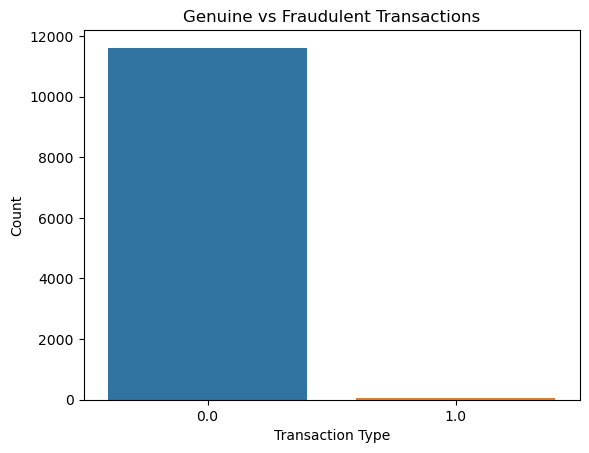

Decision Tree Model Accuracy: 0.9991
Random Forest Model Accuracy: 0.9991
Decision Tree Confusion Matrix:
 [[3481    1]
 [   2   15]]
Random Forest Confusion Matrix:
 [[3481    1]
 [   2   15]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3482
         1.0       0.94      0.88      0.91        17

    accuracy                           1.00      3499
   macro avg       0.97      0.94      0.95      3499
weighted avg       1.00      1.00      1.00      3499

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3482
         1.0       0.94      0.88      0.91        17

    accuracy                           1.00      3499
   macro avg       0.97      0.94      0.95      3499
weighted avg       1.00      1.00      1.00      3499



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# 1. Load the dataset using pandas
df = pd.read_csv(r'D:\Data Science and AI (intellipaat)\1 Python For Data science\Study materials Assignments and Case Study Solutions\Projects\datasets\creditcard.csv')

# 2. Perform missing value analysis on the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 3. Calculate the number of genuine and fraud transactions and the percentage of fraud transactions
num_genuine = len(df[df['Class'] == 0])
num_fraud = len(df[df['Class'] == 1])
percent_fraud = (num_fraud / len(df)) * 100

print(f'Number of Genuine Transactions: {num_genuine}')
print(f'Number of Fraud Transactions: {num_fraud}')
print(f'Percentage of Fraud Transactions: {percent_fraud:.2f}%')

# 4. Visualize the genuine and fraudulent transactions using a bar graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Genuine vs Fraudulent Transactions')
plt.show()

# 5. Normalize the 'Amount' column using Standard Scaler
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df[['Amount']])

# 6. Split the dataset into train and test sets (70:30 split ratio)
X = df.drop(columns=['Class', 'Amount', 'Time'])  # Dropping 'Amount' as it has been normalized and 'Time' as it might not be relevant
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Handle missing values in target variable by dropping corresponding rows
y_train = y_train.dropna()
y_test = y_test.dropna()

# Ensure X_train and y_train are aligned
X_train, y_train = X_train[:len(y_train)], y_train.values

# Ensure X_test and y_test are aligned
X_test, y_test = X_test[:len(y_test)], y_test.values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train a decision tree and random forest model on the train set
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 8. Compare the predictions of both models using predict()
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 9. Compare the accuracy of both models using score()
dt_accuracy = dt_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)

print(f'Decision Tree Model Accuracy: {dt_accuracy:.4f}')
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}')

# 10. Check the performance matrix of both models and compare
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print('Decision Tree Confusion Matrix:\n', dt_conf_matrix)
print('Random Forest Confusion Matrix:\n', rf_conf_matrix)

dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print('Decision Tree Classification Report:\n', dt_class_report)
print('Random Forest Classification Report:\n', rf_class_report)
